<a href="https://colab.research.google.com/github/VitalyGladyshev/gb_nlp/blob/main/%D0%93%D0%BB%D0%B0%D0%B4%D1%8B%D1%88%D0%B5%D0%B2%D0%92%D0%92_NLP_HW_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ДЗ 4 Гладышев ВВ

## Подготовка

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import os
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression # можно заменить на любимый классификатор
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.metrics import classification_report

In [ ]:
positive = pd.read_csv('positive.csv', sep=';', header=None, usecols=[3], names=['text'])
positive['label'] = 'positive'
positive.head()

,text,label
0,"@first_timee хоть я и школота, но поверь, у на...",positive
1,"Да, все-таки он немного похож на него. Но мой ...",positive
2,RT @KatiaCheh: Ну ты идиотка) я испугалась за ...,positive
3,"RT @digger2912: ""Кто то в углу сидит и погибае...",positive
4,@irina_dyshkant Вот что значит страшилка :D\nН...,positive


In [ ]:
negative = pd.read_csv('negative.csv', sep=';', header=None, usecols=[3], names=['text'])
negative['label'] = 'negative'
negative.tail()

,text,label
111918,Но не каждый хочет что то исправлять:( http://...,negative
111919,скучаю так :-( только @taaannyaaa вправляет мо...,negative
111920,"Вот и в школу, в говно это идти уже надо(",negative
111921,"RT @_Them__: @LisaBeroud Тауриэль, не грусти :...",negative
111922,Такси везет меня на работу. Раздумываю приплат...,negative


In [ ]:
data = pd.concat([positive, negative])
data.head()

,text,label
0,"@first_timee хоть я и школота, но поверь, у на...",positive
1,"Да, все-таки он немного похож на него. Но мой ...",positive
2,RT @KatiaCheh: Ну ты идиотка) я испугалась за ...,positive
3,"RT @digger2912: ""Кто то в углу сидит и погибае...",positive
4,@irina_dyshkant Вот что значит страшилка :D\nН...,positive


In [ ]:
data.tail()

,text,label
111918,Но не каждый хочет что то исправлять:( http://...,negative
111919,скучаю так :-( только @taaannyaaa вправляет мо...,negative
111920,"Вот и в школу, в говно это идти уже надо(",negative
111921,"RT @_Them__: @LisaBeroud Тауриэль, не грусти :...",negative
111922,Такси везет меня на работу. Раздумываю приплат...,negative


### Очистка

In [ ]:
data['text'] = data['text'].apply(lambda x: re.sub("@[\w]*", "", x))

In [ ]:
data['text'] = data['text'].str.lower()

In [ ]:
emoticon_dict = {
":)": "позитив",
":‑)": "позитив",
":-]": "позитив",
":-3": "позитив",
":->": "позитив",
"8-)": "позитив",
":-}": "позитив",
":o)": "позитив",
":c)": "позитив",
":^)": "позитив",
"=]": "позитив",
"=)": "позитив",
"<3": "позитив",
":-(": "негатив",
":(": "негатив",
":c": "негатив",
":<": "негатив",
":[": "негатив",
">:[": "негатив",
":{": "негатив",
">:(": "негатив",
":-c": "негатив",
":-< ": "негатив",
":-[": "негатив",
":-||": "негатив"
}

In [ ]:
def emoticon_replace(s: str) -> str:
    for word in s.split():
        if word in emoticon_dict.keys():
            s = s.replace(word, emoticon_dict[word])
    return s

In [ ]:
data['text'] = data['text'].apply(emoticon_replace)

In [ ]:
data['text'] = data['text'].apply(lambda x: re.sub("[^ёа-я()]", " ", x))

In [ ]:
data['text'] = data['text'].apply(lambda x: re.sub("[()]", r' \g<0> ', x))

In [ ]:
data['text'] = data['text'].apply(lambda x: re.sub("\s+", ' ', x))

In [ ]:
data['text'] = data['text'].apply(lambda x: re.sub("\\n", '', x))

In [ ]:
data['text'].head(10)

0     хоть я и школота но поверь у нас то же самое ...
1    да все таки он немного похож на него но мой ма...
2                ну ты идиотка ) я испугалась за тебя 
3     кто то в углу сидит и погибает от голода а мы...
4     вот что значит страшилка но блин посмотрев вс...
5              ну любишь или нет я не знаю кто ты бля 
6     ох ну это конечно же чтобы у нее было много д...
7       у тебя есть ухажёр нет мои уши не кто не жрёт 
8              поприветствуем моего нового читателя ) 
9          теперь у меня есть частичка сиднея позитив 
Name: text, dtype: object

In [ ]:
data.iloc[0, 0]

' хоть я и школота но поверь у нас то же самое общество профилирующий предмет типа ) '

In [ ]:
from pymystem3 import Mystem
mystem_analyzer = Mystem()

Installing mystem to /root/.local/bin/mystem from http://download.cdn.yandex.net/mystem/mystem-3.1-linux-64bit.tar.gz


In [ ]:
data['lemma'] =  data['text'].apply(lambda x: mystem_analyzer.lemmatize(x))

In [ ]:
data.iloc[0, 2]

[' ',
 'хоть',
 ' ',
 'я',
 ' ',
 'и',
 ' ',
 'школоть',
 ' ',
 'но',
 ' ',
 'поверять',
 ' ',
 'у',
 ' ',
 'мы',
 ' ',
 'то',
 ' ',
 'же',
 ' ',
 'самый',
 ' ',
 'общество',
 ' ',
 'профилировать',
 ' ',
 'предмет',
 ' ',
 'тип',
 ' ) \n']

In [ ]:
data['lemma_str'] =  data['lemma'].apply(lambda x: ''.join(x))

In [ ]:
data.iloc[0, 3]

' хоть я и школоть но поверять у мы то же самый общество профилировать предмет тип ) \n'

In [ ]:
data['lemma_str'] = data['lemma_str'].apply(lambda x: re.sub("\\n", '', x))

In [ ]:
data.iloc[0, 3]

' хоть я и школоть но поверять у мы то же самый общество профилировать предмет тип ) '

In [ ]:
data.head()

,text,label,lemma,lemma_str
0,хоть я и школота но поверь у нас то же самое ...,positive,"[ , хоть, , я, , и, , школоть, , но, , по...",хоть я и школоть но поверять у мы то же самый...
1,да все таки он немного похож на него но мой ма...,positive,"[да, , весь, , таки, , он, , немного, , п...",да весь таки он немного похожий на он но мой м...
2,ну ты идиотка ) я испугалась за тебя,positive,"[ , ну, , ты, , идиотка, ) , я, , испугать...",ну ты идиотка ) я испугаться за ты
3,кто то в углу сидит и погибает от голода а мы...,positive,"[ , кто, , то, , в, , угол, , сидеть, , и...",кто то в угол сидеть и погибать от голод а мы...
4,вот что значит страшилка но блин посмотрев вс...,positive,"[ , вот, , что, , значить, , страшилка, , ...",вот что значить страшилка но блин посмотреть ...


In [ ]:
data.tail()

,text,label,lemma,lemma_str
111918,но не каждый хочет что то исправлять (,negative,"[но, , не, , каждый, , хотеть, , что, , т...",но не каждый хотеть что то исправлять (
111919,скучаю так негатив только вправляет мозги но я...,negative,"[скучать, , так, , негатив, , только, , вп...",скучать так негатив только вправлять мозги но ...
111920,вот и в школу в говно это идти уже надо (,negative,"[вот, , и, , в, , школа, , в, , гавно, ,...",вот и в школа в гавно это идти уже надо (
111921,тауриэль не грусти негатив обнял,negative,"[ , тауриэль, , не, , грустить, , негатив, ...",тауриэль не грустить негатив обнимать
111922,такси везет меня на работу раздумываю приплати...,negative,"[такси, , везти, , я, , на, , работа, , р...",такси везти я на работа раздумывать приплачива...


In [ ]:
data['lemma'] =  data['lemma_str'].apply(lambda x: x.split())

In [ ]:
from nltk.corpus import stopwords

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import nltk
nltk.download('stopwords')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stopwords_list = stopwords.words('russian')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data['lemma_gr3'] =  data['lemma'].apply(lambda x: [w for w in x if x not in stopwords_list and len(w) >= 3 or w == '(' or w == ')'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,text,label,lemma,lemma_str,lemma_gr3
0,хоть я и школота но поверь у нас то же самое ...,positive,"[хоть, я, и, школоть, но, поверять, у, мы, то,...",хоть я и школоть но поверять у мы то же самый...,"[хоть, школоть, поверять, самый, общество, про..."
1,да все таки он немного похож на него но мой ма...,positive,"[да, весь, таки, он, немного, похожий, на, он,...",да весь таки он немного похожий на он но мой м...,"[весь, таки, немного, похожий, мой, мальчик, в..."
2,ну ты идиотка ) я испугалась за тебя,positive,"[ну, ты, идиотка, ), я, испугаться, за, ты]",ну ты идиотка ) я испугаться за ты,"[идиотка, ), испугаться]"
3,кто то в углу сидит и погибает от голода а мы...,positive,"[кто, то, в, угол, сидеть, и, погибать, от, го...",кто то в угол сидеть и погибать от голод а мы...,"[кто, угол, сидеть, погибать, голод, еще, порц..."
4,вот что значит страшилка но блин посмотрев вс...,positive,"[вот, что, значить, страшилка, но, блин, посмо...",вот что значить страшилка но блин посмотреть ...,"[вот, что, значить, страшилка, блин, посмотрет..."


## Задание

1. объединить в одну выборку (это только для твитов), для роспотребнадзора сформировать датасет из вопросов
2. провести исследование и выявить тематики о которых говорят в твитах (для твитов), а для роспотребнадзора так же выявить тематики о которых люди пишут проанализировать
3. сделать визуализацию кластеров тематик
4. проинтерпритировать получившиеся тематики

In [ ]:
!pip install -U gensim

In [ ]:
from gensim.models import *
from gensim import corpora

Создадим словарь:

In [ ]:
dictionary = corpora.Dictionary(data['lemma_gr3'])

dictionary.filter_extremes(no_below = 10, no_above = 0.9, keep_n=None) # игнорируем слова, которые встречаются реже 10 раз или составляют более 0.9 словаря
dictionary.save('topics_an.dict')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
cnt = 0
for key, val in dictionary.iteritems():
    print(f"{key}: {val}")
    cnt += 1
    if cnt > 10:
        break

0: )
1: общество
2: поверять
3: предмет
4: самый
5: тип
6: хоть
7: школоть
8: весь
9: мальчик
10: мой


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Векторизуем документы:

In [ ]:
corpus = [dictionary.doc2bow(text) for text in data['lemma_gr3']]
corpora.MmCorpus.serialize('topics_an.model', corpus)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
type(corpus), corpus[:3]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(list,
 [[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)],
  [(8, 2), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1)],
  [(0, 1), (16, 1), (17, 1)]])

Обучим модель:

In [ ]:
%time lda = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=12, chunksize=50, update_every=1, passes=2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CPU times: user 1min 59s, sys: 313 ms, total: 2min
Wall time: 2min


Темы:

In [ ]:
lda.show_topics(num_topics=12, num_words=10, formatted=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.115*"какой" + 0.083*"там" + 0.071*"смотреть" + 0.065*"жизнь" + 0.051*"никто" + 0.035*"через" + 0.034*"нельзя" + 0.025*"купить" + 0.021*"боль" + 0.020*"сука"'),
 (1,
  '0.130*"мой" + 0.036*"скучать" + 0.026*"твой" + 0.021*"новый" + 0.021*"любимый" + 0.020*"заканчиваться" + 0.018*"домой" + 0.017*"уезжать" + 0.016*"ужасный" + 0.016*"минута"'),
 (2,
  '0.899*"(" + 0.011*"свой" + 0.006*"каждый" + 0.005*"начинать" + 0.003*"ходить" + 0.002*"почти" + 0.002*"печально" + 0.002*"третий" + 0.002*"забирать" + 0.002*"печаль"'),
 (3,
  '0.111*"еще" + 0.084*"они" + 0.080*"очень" + 0.059*"вообще" + 0.057*"даже" + 0.053*"спать" + 0.051*"любить" + 0.045*"сказать" + 0.040*"тот" + 0.029*"где"'),
 (4,
  '0.067*"как" + 0.066*"этот" + 0.066*"когда" + 0.024*"который" + 0.024*"время" + 0.023*"утро" + 0.021*"всегда" + 0.019*"плохо" + 0.019*"потом" + 0.016*"приходить"'),
 (5,
  '0.159*"это" + 0.090*"такой" + 0.087*"быть" + 0.073*"она" + 0.037*"сейчас" + 0.036*"много" + 0.024*"говорить" + 0.017*"друг" + 

## Визуализация

In [ ]:
!pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 59.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 30.9 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
bigframes 0.20.1 requires pandas<2.1.4,>=1.5.0, but you have pandas 2.2.0 which is incompatible.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.2.0 which is incompatible.


In [ ]:
!pip uninstall pandas -y

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Found existing installation: pandas 2.2.0
Uninstalling pandas-2.2.0:
  Successfully uninstalled pandas-2.2.0


In [ ]:
!pip install "pandas<2.0.0"

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 53.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
pyldavis 3.4.1 requires pandas>=2.0.0, but you have pandas 1.5.3 which is incompatible.


### 12 тем

In [ ]:
import pyLDAvis
import pyLDAvis.gensim as gensimvis

%time vis_data = gensimvis.prepare(lda, corpus, dictionary)
pyLDAvis.display(vis_data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CPU times: user 9.95 s, sys: 118 ms, total: 10.1 s
Wall time: 12.3 s


/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


In [ ]:
print('Персплексия: ', np.exp(lda.log_perplexity(corpus)))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Персплексия:  2.5648523365479223e-05


In [ ]:
coherence_model_lda = CoherenceModel(model=lda, texts=data['lemma_gr3'], dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Средняя когерентность: ', coherence_lda)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Средняя когерентность:  0.269273798272682


### 6 тем

In [ ]:
%time lda_6t = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=6, chunksize=50, update_every=1, passes=2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CPU times: user 1min 31s, sys: 364 ms, total: 1min 32s
Wall time: 1min 35s


In [ ]:
lda_6t.show_topics(num_topics=6, num_words=10, formatted=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.037*"они" + 0.036*"очень" + 0.034*"негатив" + 0.033*"кто" + 0.033*"завтра" + 0.022*"еще" + 0.022*"делать" + 0.020*"идти" + 0.020*"это" + 0.019*"школа"'),
 (1,
  '0.077*"мой" + 0.044*"негатив" + 0.033*"спать" + 0.023*"опять" + 0.018*"тут" + 0.013*"настроение" + 0.013*"пока" + 0.013*"два" + 0.013*"любимый" + 0.012*"плохой"'),
 (2,
  '0.072*"весь" + 0.029*"там" + 0.028*"себя" + 0.026*"самый" + 0.024*"смотреть" + 0.021*"думать" + 0.018*"негатив" + 0.017*"никто" + 0.017*"хороший" + 0.015*"твой"'),
 (3,
  '0.523*"(" + 0.023*"что" + 0.016*"вот" + 0.014*"этот" + 0.014*"когда" + 0.014*"день" + 0.014*"нет" + 0.010*"знать" + 0.009*"какой" + 0.009*"блин"'),
 (4,
  '0.055*"что" + 0.041*"так" + 0.038*"хотеть" + 0.037*"это" + 0.034*"негатив" + 0.031*"быть" + 0.027*"такой" + 0.024*"только" + 0.021*"она" + 0.019*"все"'),
 (5,
  '0.108*"(" + 0.090*"как" + 0.037*"мочь" + 0.032*"сегодня" + 0.029*"все" + 0.025*"надо" + 0.024*"быть" + 0.022*"теперь" + 0.017*"уже" + 0.015*"писать"')]

In [ ]:
%time vis_data_6t = gensimvis.prepare(lda_6t, corpus, dictionary)
pyLDAvis.display(vis_data_6t)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CPU times: user 14.1 s, sys: 104 ms, total: 14.2 s
Wall time: 14.9 s


/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


In [ ]:
print('Персплексия: ', np.exp(lda_6t.log_perplexity(corpus)))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Персплексия:  0.00017201021759735583


In [ ]:
coherence_model_lda_6t = CoherenceModel(model=lda_6t, texts=data['lemma_gr3'], dictionary=dictionary, coherence='c_v')
coherence_lda_6t = coherence_model_lda_6t.get_coherence()
print('Средняя когерентность: ', coherence_lda_6t)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Средняя когерентность:  0.2811801105860956


### 4 темы

In [ ]:
%time lda_4t = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=4, chunksize=50, update_every=1, passes=2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CPU times: user 1min 15s, sys: 314 ms, total: 1min 15s
Wall time: 1min 16s


In [ ]:
lda_4t.show_topics(num_topics=4, num_words=10, formatted=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.041*"хотеть" + 0.026*"негатив" + 0.025*"мочь" + 0.024*"этот" + 0.024*"день" + 0.022*"быть" + 0.021*"сегодня" + 0.020*"уже" + 0.018*"завтра" + 0.017*"все"'),
 (1,
  '0.058*"это" + 0.042*"негатив" + 0.037*"что" + 0.033*"такой" + 0.026*"она" + 0.021*"быть" + 0.018*"какой" + 0.016*"даже" + 0.014*"как" + 0.014*"делать"'),
 (2,
  '0.471*"(" + 0.018*"так" + 0.013*"вот" + 0.012*"что" + 0.012*"когда" + 0.009*"как" + 0.009*"кто" + 0.008*"знать" + 0.008*"только" + 0.008*"быть"'),
 (3,
  '0.046*"что" + 0.026*"негатив" + 0.020*"так" + 0.018*"все" + 0.017*"просто" + 0.016*"один" + 0.016*"очень" + 0.015*"как" + 0.015*"они" + 0.014*"любить"')]

In [ ]:
%time vis_data_4t = gensimvis.prepare(lda_4t, corpus, dictionary)
pyLDAvis.display(vis_data_4t)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CPU times: user 14.8 s, sys: 121 ms, total: 14.9 s
Wall time: 15.3 s


/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


In [ ]:
print('Персплексия: ', np.exp(lda_4t.log_perplexity(corpus)))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Персплексия:  0.00024256496824687096


In [ ]:
coherence_model_lda_4t = CoherenceModel(model=lda_4t, texts=data['lemma_gr3'], dictionary=dictionary, coherence='c_v')
coherence_lda_4t = coherence_model_lda_4t.get_coherence()
print('Средняя когерентность: ', coherence_lda_4t)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Средняя когерентность:  0.31329508413765217


### 3 темы

In [ ]:
%time lda_3t = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=3, chunksize=50, update_every=1, passes=2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CPU times: user 1min 9s, sys: 362 ms, total: 1min 10s
Wall time: 1min 10s


In [ ]:
lda_3t.show_topics(num_topics=3, num_words=10, formatted=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.042*"что" + 0.033*"негатив" + 0.027*"хотеть" + 0.025*"быть" + 0.018*"весь" + 0.018*"еще" + 0.016*"мочь" + 0.015*"нет" + 0.013*"это" + 0.013*"все"'),
 (1,
  '0.045*"негатив" + 0.023*"как" + 0.020*"мой" + 0.016*"это" + 0.016*"такой" + 0.015*"любить" + 0.015*"делать" + 0.015*"очень" + 0.013*"самый" + 0.012*"тот"'),
 (2,
  '0.386*"(" + 0.017*"как" + 0.015*"так" + 0.013*"что" + 0.011*"вот" + 0.011*"все" + 0.010*"когда" + 0.010*"день" + 0.009*"уже" + 0.008*"быть"')]

In [ ]:
%time vis_data_3t = gensimvis.prepare(lda_3t, corpus, dictionary)
pyLDAvis.display(vis_data_3t)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CPU times: user 16.4 s, sys: 201 ms, total: 16.6 s
Wall time: 18 s


/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


In [ ]:
print('Персплексия: ', np.exp(lda_3t.log_perplexity(corpus)))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Персплексия:  0.0002898320875298676


In [ ]:
coherence_model_lda_3t = CoherenceModel(model=lda_3t, texts=data['lemma_gr3'], dictionary=dictionary, coherence='c_v')
coherence_lda_3t = coherence_model_lda_3t.get_coherence()
print('Средняя когерентность: ', coherence_lda_3t)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Средняя когерентность:  0.3054414766844019


### 2 темы

Можно ожидать разделения по принципу нагатив/позитив

In [ ]:
%time lda_2t = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=2, chunksize=50, update_every=1, passes=2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CPU times: user 57.9 s, sys: 338 ms, total: 58.3 s
Wall time: 58.4 s


In [ ]:
lda_2t.show_topics(num_topics=2, num_words=10, formatted=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.281*"(" + 0.029*"что" + 0.020*"быть" + 0.016*"так" + 0.014*"все" + 0.013*"как" + 0.012*"хотеть" + 0.008*"это" + 0.008*"уже" + 0.008*"еще"'),
 (1,
  '0.060*"негатив" + 0.021*"мой" + 0.020*"такой" + 0.015*"это" + 0.012*"они" + 0.011*"какой" + 0.011*"весь" + 0.011*"как" + 0.008*"этот" + 0.007*"вот"')]

In [ ]:
%time vis_data_2t = gensimvis.prepare(lda_2t, corpus, dictionary)
pyLDAvis.display(vis_data_2t)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CPU times: user 16.9 s, sys: 184 ms, total: 17.1 s
Wall time: 17.3 s


/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


In [ ]:
print('Персплексия: ', np.exp(lda_2t.log_perplexity(corpus)))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Персплексия:  0.0003441216724921745


In [ ]:
coherence_model_lda_2t = CoherenceModel(model=lda_2t, texts=data['lemma_gr3'], dictionary=dictionary, coherence='c_v')
coherence_lda_2t = coherence_model_lda_2t.get_coherence()
print('Средняя когерентность: ', coherence_lda_2t)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Средняя когерентность:  0.30231680558268215


### Оптимальное количество тем

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm.notebook import tqdm

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  0%|          | 0/6 [00:00<?, ?it/s]

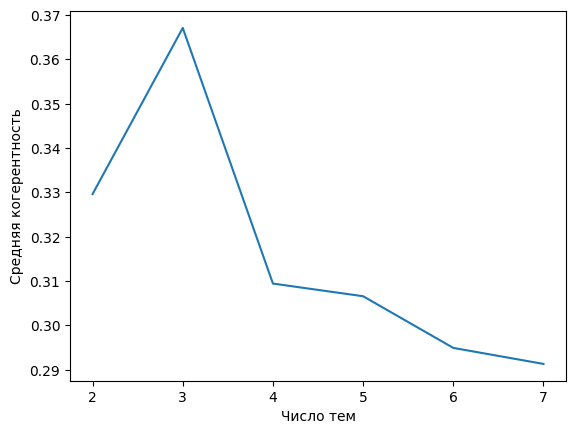

In [ ]:
topics_list = [7, 6, 5, 4, 3, 2]
coherences = []

for num in tqdm(topics_list):
    lda = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=num, chunksize=50, update_every=1, passes=2)
    coherences.append(CoherenceModel(model=lda, texts=data['lemma_gr3'], dictionary=dictionary, coherence='c_v').get_coherence())

plt.plot(topics_list, coherences)
plt.xlabel("Число тем")
plt.ylabel("Средняя когерентность")
plt.show()

В соответствии с значением когерентности оптимально разделять на три темы. В разделении на три темы не удаётся однозначно идентифицировать критерий разделения. Однако для первой темы можно выделить лексику характерную для описания времени, периода или планирования в т.ч. расписания. Вторая тема содержит лексику характерную для вопросов - значительная доля вопросительных слов. Третья тема содержит лексику характеризующую состояние - констатацию. Во всех трёх темах слова характеризующие негативный оттенок имеют лидирующие позиции - маркер использованный для замены негативных смайликов ("негатив"), а также обратная скобка. Разделить темы по признаку негатив/позитив (по назначению датасета) не получилось.